AM1 - 2022/1 - Trabalho 2:
Agrupamento

João Pedro Trevisan -     769774  
Melissa Campelo Amora Fontenelle -   769824  
Vinicius Borges de Lima - 795316

# Importando Bibliotecas

In [ ]:
!pip install plotly==5.5.0
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

import hdbscan

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Descrição das colunas

**pais:** Nome do país <br>
**mortalidade_infantil:** Morte de crianças de até 5 anos por 1000 nascimentos <br> 
**exportacao:** % de todo os produtos e serviços exportados em relação ao PIB per capita <br>
**gasto_saude** % do dinheiro gasto com saúde em relação ao PIB per capita<br>
**importacao:** % de todo os produtos e serviços importados em relação ao PIB per capita <br>
**renda**: Renda média por pessoa <br>
**inflacao:** Crescimento anual da inflação <br>
**expectativa_vida:** expectativa de vida de uma recem nascido caso os mesmos padrões de mortalidade sejam mantidos<br>
**fertilidade:**: Número de bebês que irão nascer por cada mulher no país caso a taxa de fertilidade seja a mesma<br>
**pib_per_capita:** PIB dividido pela população total

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ViniBL/countrydata/main/Country-data.csv")
df2 = df.copy()
df2.columns = ["pais","mortalidade_infantil","exportacao","gasto_saude","importacao","renda","inflacao","expectativa_vida","fertilidade","pib_per_capita"]
df.head(110)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
5,Argentina,14.50,18.90,8.10,16.00,18700,20.90,75.80,2.37,10300
6,Armenia,18.10,20.80,4.40,45.30,6700,7.77,73.30,1.69,3220
7,Australia,4.80,19.80,8.73,20.90,41400,1.16,82.00,1.93,51900
8,Austria,4.30,51.30,11.00,47.80,43200,0.87,80.50,1.44,46900
9,Azerbaijan,39.20,54.30,5.88,20.70,16000,13.80,69.10,1.92,5840


# Análise exploratória

Vamos usar algumas funções para explorar os dados do nosso dataset para saber como melhor tratá-los.

A função info vai nos dar o formato das variáveis. Podemos ver que a maioria está em float, o que nos diz que provavelmente serão variáveis contínuas. As únicas que diferem disso são "país", que está como objeto, ou seja, é nominal, além de atuar como um identificador para as tuplas, e "pib per capita" e "renda" que estão como inteiro, provavelmente discreto.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  167 non-null    object 
 1   mortalidade_infantil  167 non-null    float64
 2   exportacao            167 non-null    float64
 3   gasto_saude           167 non-null    float64
 4   importacao            167 non-null    float64
 5   renda                 167 non-null    int64  
 6   inflacao              167 non-null    float64
 7   expectativa_vida      167 non-null    float64
 8   fertilidade           167 non-null    float64
 9   pib_per_capita        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


A função ``isnull`` mostra quantas entradas nulas temos em cada coluna. Não possuímos nenhuma, então não teremos que lidar com problemas dessa natureza.

In [ ]:
df2.isnull().sum()

pais                    0
mortalidade_infantil    0
exportacao              0
gasto_saude             0
importacao              0
renda                   0
inflacao                0
expectativa_vida        0
fertilidade             0
pib_per_capita          0
dtype: int64

A grande quantidade de valores únicos indicados aqui para as categorias em float, que se aproximam ao número de países no dataset, nos dá certeza de que as variáveis são **contínuas** ao contrário de discretas. O PIB per capita e a renda são discretas, por serem valores inteiros.

In [ ]:
df2.nunique()

pais                    167
mortalidade_infantil    139
exportacao              147
gasto_saude             147
importacao              151
renda                   156
inflacao                156
expectativa_vida        127
fertilidade             138
pib_per_capita          157
dtype: int64

Aqui podemos saber um pouco mais sobre os valores dos dados. Os valores estão em escalas muito diferentes, um indicativo que teremos que normalizá-los durante o pré-processamento.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df2.describe(percentiles = [.25, .5, .75, .90 ,.95, .99]).transpose()


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
mortalidade_infantil,167.00,38.27,40.33,2.60,8.25,19.30,62.10,100.22,116.00,153.40,208.00
exportacao,167.00,41.11,27.41,0.11,23.80,35.00,51.35,70.80,80.57,160.48,200.00
gasto_saude,167.00,6.82,2.75,1.81,4.92,6.32,8.60,10.94,11.57,13.47,17.90
importacao,167.00,46.89,24.21,0.07,30.20,43.30,58.75,75.42,81.14,146.08,174.00
renda,167.00,17144.69,19278.07,609.00,3355.00,9960.00,22800.00,41220.00,48290.00,84374.00,125000.00
inflacao,167.00,7.78,10.57,-4.21,1.81,5.39,10.75,16.64,20.87,41.48,104.00
expectativa_vida,167.00,70.56,8.89,32.10,65.30,73.10,76.80,80.40,81.40,82.37,82.80
fertilidade,167.00,2.95,1.51,1.15,1.79,2.41,3.88,5.32,5.86,6.56,7.49
pib_per_capita,167.00,12964.16,18328.70,231.00,1330.00,4660.00,14050.00,41840.00,48610.00,79088.00,105000.00


Abaixo podemos observar um ranking dos menores PIBs per capita. Fizemos essas observações para conferir se os dados do dataset realmente refletiam a realidade, se não haveria nada absurdo. Por exemplo, se um país conhecidamente rico (como um dos países escandinavos) estivesse entre os PIBs mais baixos, possivelmente buscaríamos outro dataset para trabalhar.

In [ ]:
df3 = df2.set_index('pais')
df3['pib_per_capita'].nsmallest(n=20)

pais
Burundi                     231
Liberia                     327
Congo, Dem. Rep.            334
Niger                       348
Sierra Leone                399
Madagascar                  413
Mozambique                  419
Central African Republic    446
Malawi                      459
Eritrea                     482
Togo                        488
Guinea-Bissau               547
Afghanistan                 553
Gambia                      562
Rwanda                      563
Burkina Faso                575
Nepal                       592
Uganda                      595
Guinea                      648
Haiti                       662
Name: pib_per_capita, dtype: int64

Abaixo temos os maiores PIBs per capita. Essa tabela também condiz com o conhecimento geral de mundo, e assim podemos inferir que o restante do dataset também condiz.

In [ ]:
df3['pib_per_capita'].nlargest(n=20)

pais
Luxembourg        105000
Norway             87800
Switzerland        74600
Qatar              70300
Denmark            58000
Sweden             52100
Australia          51900
Netherlands        50300
Ireland            48700
United States      48400
Canada             47400
Austria            46900
Singapore          46600
Finland            46200
Japan              44500
Belgium            44400
Iceland            41900
Germany            41800
France             40600
United Kingdom     38900
Name: pib_per_capita, dtype: int64

## Heatmaps

Nessa sessão vamos criar heatmaps, ou mapas de calor, para buscar correlação entre dados e, possívelmente, usar esse conhecimento para diminuir a dimensionalidade do nosso modelo.

### Normalização

Vimos anteriormente que nossos dados estão em escalas muito discrepantes entre si. Vamos normalizá-los por MinMax, forçando todos em um intervalo de 0 a 1.

Isso é feito antes da análise dos heatmaps pois dessa forma seremos capazes de comparar todas correlações por estarem na mesma escala.

In [ ]:
mms = preprocessing.MinMaxScaler()
df_no_name = df2.drop('pais', axis=1)
df_norm = mms.fit_transform(df_no_name.to_numpy())
df_norm = pd.DataFrame(df_norm, columns=["mortalidade_infantil","exportacao","gasto_saude","importacao","renda","crescimento_pib",
                                         "expectativa_vida","fertilidade","pib_per_capita"])
df_norm = pd.concat((df_norm, df2.pais), 1)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,mortalidade_infantil,exportacao,gasto_saude,importacao,renda,crescimento_pib,expectativa_vida,fertilidade,pib_per_capita,pais
0,0.43,0.05,0.36,0.26,0.01,0.13,0.48,0.74,0.00,Afghanistan
1,0.07,0.14,0.29,0.28,0.07,0.08,0.87,0.08,0.04,Albania
2,0.12,0.19,0.15,0.18,0.10,0.19,0.88,0.27,0.04,Algeria
3,0.57,0.31,0.06,0.25,0.04,0.25,0.55,0.79,0.03,Angola
4,0.04,0.23,0.26,0.34,0.15,0.05,0.88,0.15,0.11,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,0.13,0.23,0.21,0.30,0.02,0.06,0.61,0.37,0.03,Vanuatu
163,0.07,0.14,0.19,0.10,0.13,0.46,0.85,0.21,0.13,Venezuela
164,0.10,0.36,0.31,0.46,0.03,0.15,0.81,0.13,0.01,Vietnam
165,0.26,0.15,0.21,0.20,0.03,0.26,0.70,0.56,0.01,Yemen


### Pearson

O coeficiente de Pearson mede a relação estatística entre duas variáveis contínuas, podendo variar de -1 a +1. O valor 0 indica que não há relação entre as variáveis, um valor maior que 0 indica relação positiva entre elas e um valor menor que 0 indica relação negativa. Uma relação positiva significa que, quando uma variável da relação cresce, a outra também cresce, enquanto na relação negativa essa segunda variável diminui, e vice-versa.

Para esse cálculo é necessário que os dados estejam normalizados, por isso fizemos isso na célula acima.

O cálculo é feito pela fórmula abaixo

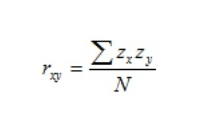

onde X é a primeira variável, Y a segunda, Zx é o desvio padrão da primeira variáveL, Zy o desvio padrão da segunda e N o número de dados.

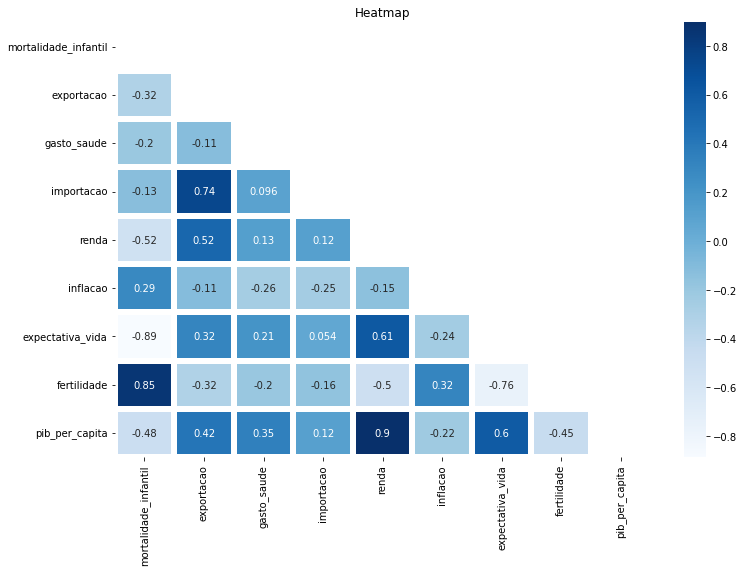

In [ ]:
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True

#Cria o gráfico de calor 
plt.figure(figsize=(12,8))
plt.title('Heatmap')
sns.heatmap(df2.corr(method="pearson"), cmap='Blues', annot=True, mask=mask, linewidths=5)
plt.show()

### Spearman

O coeficiente de correlação de Spearman é uma medida não paramétrica de correlação de postos, que significa uma dependência estatística do ranking entre duas variáveis. O coeficiente de Spearman funciona melhor para relações não lineares, que é um dos empecilhos de Pearson.

Spearman pode ser calculado por

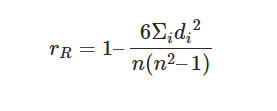

onde n é o numero de países, di a diferença de alcance de n.

O coeficiente de Spearman pode assumir valores entre -1 e +1. O valor 0 significa que não há relação entre as variáveis; +1 significa uma associação perfeita; e -1 significa uma associação negativa perfeita. 

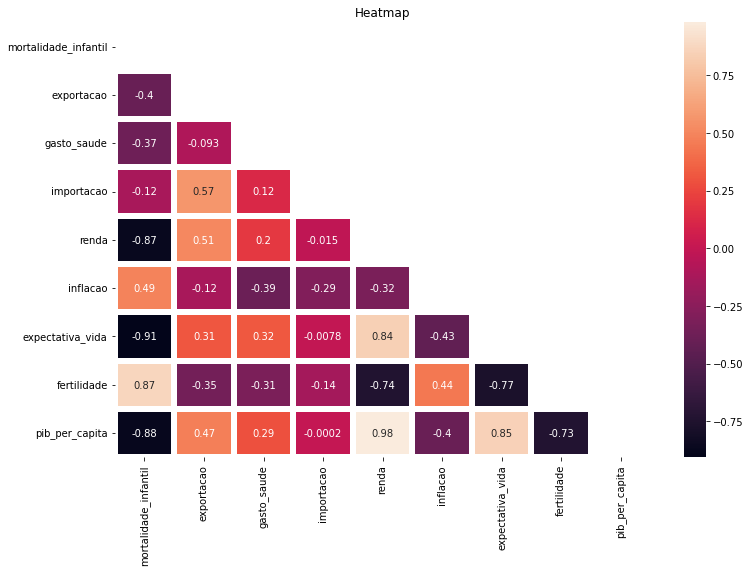

In [ ]:
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True

#Cria o gráfico de calor 
plt.figure(figsize=(12,8))
plt.title('Heatmap')
sns.heatmap(df2.corr(method="spearman"), annot=True, mask=mask, linewidths=5)
plt.show()

Por meio dos heatmaps podemos observar que existem correlações altas entre alguns elementos e também bem baixa em outros. A seguir plotamos alguns gŕaficos para demonstrar essas relações.

Ainda que isso seja indicativo de atributos a serem escolhidos, uma coisa que observamos mas não incluimos no trabalho é que diminuir a dimensionalidade apenas atrapalhou a criação do nosso modelo e portanto resolvemos usar todos os atributos.

## Regplots

Plotamos alguns gráficos para demonstrar a correlação entre duas variáveis. A linha de regressão linear possui uma margem que acompanha o desvio padrão dos dados naquele x. Com isso, vamos basicamente visualizar as informações que os heatmaps nos trouxeram.

### Expectativa de vida x Mortalidade infantil

Abaixo, temos um gráfico de expectativa de vida por mortalidade infantil, e confirmamos que baixa fertilidade implica em expectativa de vida alta. Se voltarmos nos heatmaps temos que suas correlações são -0,89 e -0,91, para Pearson e Spearman respectivamente.

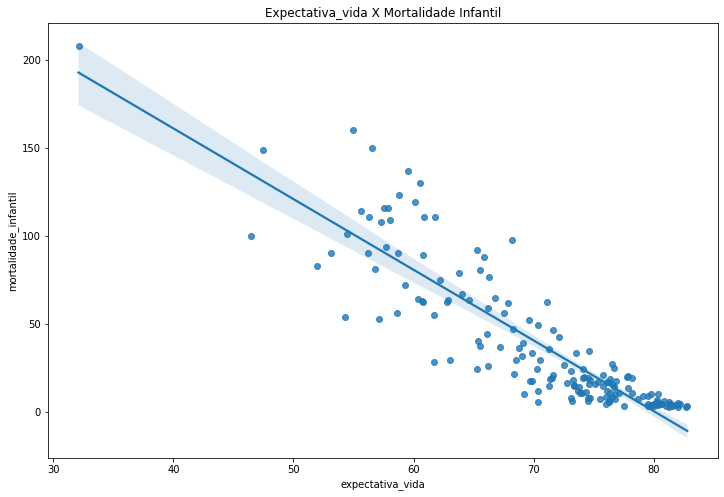

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Expectativa_vida X Mortalidade Infantil')
sns.regplot(data=df2, x="expectativa_vida", y="mortalidade_infantil")
plt.show()

### Expectativa de vida x Fertilidade
Aqui temos "expectativa de vida" por "fertilidade". De novo, um gráfico decrescente que implica uma relação inversamente proporcional. Os valores dos heatmaps para esses atributos foram -0,76 e -0,77.

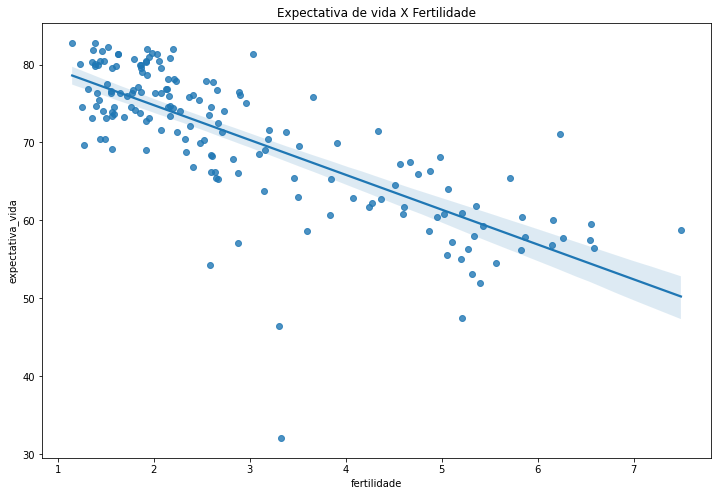

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Expectativa de vida X Fertilidade')
sns.regplot(data=df2, x="fertilidade", y="expectativa_vida")
plt.show()

### PIB per capita x Expectativa de vida

O gráfico para essa correlação é crescente, o que implica uma relação proporcional. Para esses atributos, os valores de Pearson e Spearman são 0,6 e 0,85.

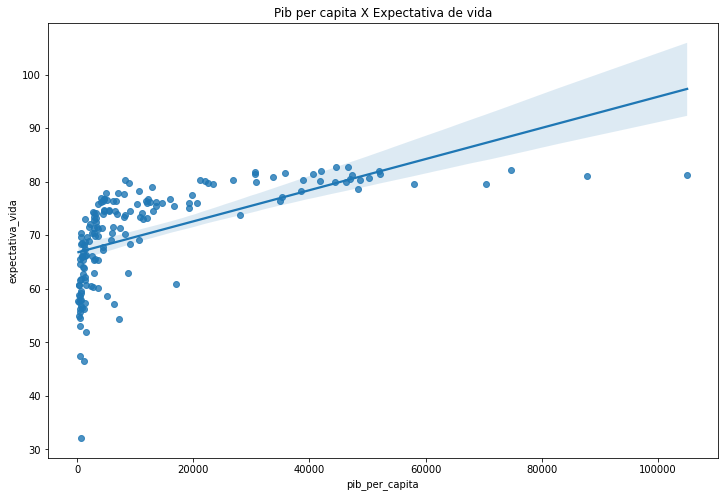

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Pib per capita X Expectativa de vida')
sns.regplot(data=df2, x="pib_per_capita", y="expectativa_vida")
plt.show()

### PIB per capita x Fertilidade

Pelas observações acima, podemos inferir que pib per capita alto implica em fertilidade baixa?

Vamos conferir.

Como podemos ver abaixo, o gráfico é decrescente, ou seja, a relação é, sim, inversamente proporcional. Podemos, também, conferir os coeficientes de Pearson e Spearman, que nos dizem a mesma coisa: -0,45 e -0,73.

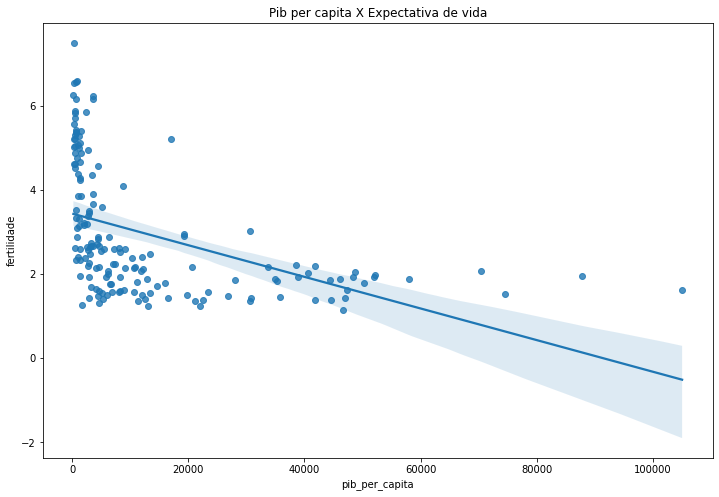

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Pib per capita X Expectativa de vida')
sns.regplot(data=df2, x="pib_per_capita", y="fertilidade")
plt.show()

# Choropleths

O Choropleths é um pacote que plota gráficos em formato de mapa mundi, o que é perfeito para o nosso dataset. Ele colore o mapa de forma a ilustrar os dados recebidos, onde, por exemplo, os mais escuros representam os mais ricos e os mais claros, os mais pobres. Os países que não aparecem no mapa são os que estão faltando no próprio dataset, ou são países muito pequenos, como os países caribenhos. Apesar disso, a apresentação do mapa é tão interessante para o entendimento do dataset, e os países que são muito pequenos são poucos em relação ao todo, que ainda faz sentido observarmos esse plot.

## Pré-processamento

Nessa etapa, o nome de alguns países será alterado para a lista de nomes que o choropleth usa, para que nenhum país fique de fora do gráfico gerado.

In [ ]:
pd.set_option('display.max_rows',110)

#essa é a lista de nomes usada na hora de gerar o mapa
paises_atualizados = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'N. Cyprus', 'Namibia', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'Norway', 'Oman', 'Pakistan', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'S. Sudan', 'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone', 'Slovakia', 'Slovenia', 'Solomon Is.', 'Somalia', 'Somaliland', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'W. Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'eSwatini']
paises_antigos = df2['pais'].unique()
diferenca = []
antigo = []

for item in paises_atualizados:
  if item not in paises_antigos:
    diferenca.append(item)

paises_atualizados = pd.Series(paises_atualizados)
paises_atualizados = paises_atualizados.replace(
    ['Bosnia and Herz.', 'Central African Rep.', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Dominican Rep.', 'Eq. Guinea', 'Macedonia', 'Myanmar', 'N. Cyprus', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'United States of America'],
    ['Bosnia and Herzegovina','Central African Republic','Congo, Rep.',"Cote d'Ivoire",'Congo, Dem. Rep.','Dominican Republic','Equatorial Guinea','Macedonia, FYR','Myanmar','Cyprus','Sudan','Slovak Republic','Solomon Islands','United States'])

atualizado_df = pd.DataFrame({'pais':paises_atualizados.unique()})

df4 = pd.merge(df2,atualizado_df,on='pais',how='inner')


## PIB per capita

In [ ]:
fig = px.choropleth(df4,
                        locationmode='country names',
                        locations='pais',
                        color="pib_per_capita",
                        title="Pib per capita"
                       )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Expectativa de vida

In [ ]:
fig = px.choropleth(df4,
                        locationmode='country names',
                        locations='pais',
                        color="expectativa_vida",
                        title="Pib per capita"
                       )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Podemos observar, a partir desses gráficos, que os países que apresentam menor expectativa de vida também apresentam baixo PIB per capita, mas o contrário não é sempre verdade. Com isso, já podemos ver certo tipo de agrupamento acontecendo.

# Agrupamento

Para agrupar esse conjunto de dados vamos usar 3 algoritmos de agrupamento diferentes: K-means, DBSCAN e HDBSCAN. Em todos eles, estamos usando a distância euclididana. Ao final, poderemos comparar os resultados e concluir qual método se encaixa melhor para o nosso problema.

## K-means

K-means, ou K-médias, é o mais famoso algoritmo de agrupamento, por ser simples, rápido e eficiente. O algoritmo começa escolhendo K (número de clusters, passado pelo usuário) centróides, aleatoriamente, entre os dados. Depois, cada objeto é associado ao seu centróide mais próximo. Para todas as interações depois dessa, o contróide é a média aritmética de todos os pontos a do cluster. A associação ao cluster e a definição de um novo centróide se dividem até que os dados parem de mudar de cluster, ou seja, aquele é o agrupamento correto.

Como dito anteriormente, nossos dados estão em escalas muito diferentes. No pacote sklearn, a implementação do K-means é feita com distância euclidiana, tal que essa diferença de escalas seria prejudicial, portanto, estamos usando o conjunto de dados normalizados (df_norm).

### Joelho (ou Cotovelo)

Um dos problemas do K-means é desconbrir qual o número ideal de clusters (K) para o problema. O método do joelho (ou cotovelo) calcula o K-means para vários K diferentes e mede a inertia em cada um. Quando a inertia para de cair drasticamente, é seguro dizer que o número de clusters estar maior não está melhorando o agrupamento. Então, a "ponta", ou o joelho, do gráfico representa o número ideal de clusters para o problema.

In [ ]:
df_norm

,mortalidade_infantil,exportacao,gasto_saude,importacao,renda,crescimento_pib,expectativa_vida,fertilidade,pib_per_capita,pais
0,0.43,0.05,0.36,0.26,0.01,0.13,0.48,0.74,0.00,Afghanistan
1,0.07,0.14,0.29,0.28,0.07,0.08,0.87,0.08,0.04,Albania
2,0.12,0.19,0.15,0.18,0.10,0.19,0.88,0.27,0.04,Algeria
3,0.57,0.31,0.06,0.25,0.04,0.25,0.55,0.79,0.03,Angola
4,0.04,0.23,0.26,0.34,0.15,0.05,0.88,0.15,0.11,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
162,0.13,0.23,0.21,0.30,0.02,0.06,0.61,0.37,0.03,Vanuatu
163,0.07,0.14,0.19,0.10,0.13,0.46,0.85,0.21,0.13,Venezuela
164,0.10,0.36,0.31,0.46,0.03,0.15,0.81,0.13,0.01,Vietnam
165,0.26,0.15,0.21,0.20,0.03,0.26,0.70,0.56,0.01,Yemen


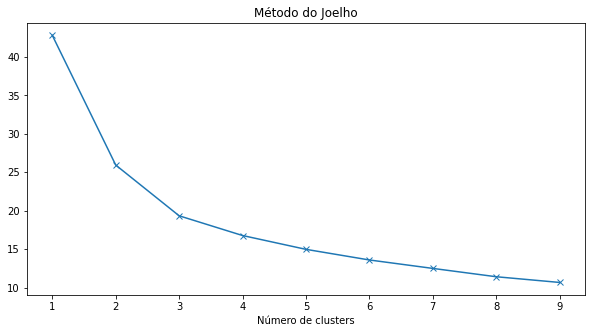

In [ ]:
df_norm2 = df_norm.set_index("pais")
k = [] 
sse = [] 
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(df_norm2)
    k.append(i)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(k, sse, marker='x')
plt.xlabel('Número de clusters')
plt.title('Método do Joelho')
plt.show()

#### Índice de silhueta

A análise da silhueta se refere a um método de interpretação e validação de consistência dentro de um grupo de dados. A silhueta mede o quão semelhante um dado é ao seu cluster. Nesse caso, estamos usando ela como critério de desempate entre os melhores valores encontrados pelo método do joelho. Como pode-se observar abaixo, 4 clusters tem o maior índice, e, assim, é o melhor número para ser usado no K-means.

In [ ]:
for i in [3,4,5]:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(df_norm2)
    print(f'{i} clusters -> Método da Silhueta: {silhouette_score(df_norm2, kmeans.labels_):.4f}')

3 clusters -> Método da Silhueta: 0.3393
4 clusters -> Método da Silhueta: 0.3497
5 clusters -> Método da Silhueta: 0.2576


### Aplicação

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1)

kmeans.fit(df_norm2)

df_norm2['cluster'] = kmeans.labels_

df_km = df2.merge(df_norm2['cluster'], left_on='pais', right_on=df_norm2.index)
df_km.set_index('pais')
df_km0 = df_km.copy()
df_km.drop('pais',axis=1,inplace=True)
df_kmeans = df_km0.copy()


### Analisando os resultados

Aqui será feito a análise do resultado da clusterização. 


In [ ]:
media = df_km.groupby('cluster').mean()
df_q = pd.DataFrame()

divisao = media.apply(lambda x: pd.qcut(x.rank(method="first"),[0,.2,.4,.65,.8,1.],labels=["Muito abaixo","Abaixo","Média","Acima","Muito acima"]), axis=0)


In [ ]:
divisao

,mortalidade_infantil,exportacao,gasto_saude,importacao,renda,inflacao,expectativa_vida,fertilidade,pib_per_capita
cluster,,,,,,,,,
0,Acima,Abaixo,Muito abaixo,Acima,Abaixo,Acima,Abaixo,Acima,Abaixo
1,Muito acima,Muito abaixo,Abaixo,Abaixo,Muito abaixo,Muito acima,Muito abaixo,Muito acima,Muito abaixo
2,Muito abaixo,Muito acima,Acima,Muito acima,Muito acima,Muito abaixo,Muito acima,Muito abaixo,Muito acima
3,Abaixo,Acima,Muito acima,Muito abaixo,Acima,Abaixo,Acima,Abaixo,Acima


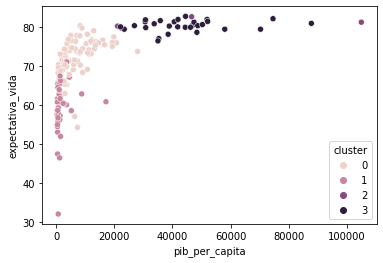

In [ ]:
sns.scatterplot(data=df_km0, x="pib_per_capita", y="expectativa_vida",hue="cluster")


In [ ]:
df_km0['cluster'] = df_km0['cluster'].map({1:'Situação crítica',0:'Situação ruim',3:'Situacao boa',2:'Situação Excelente'})

In [ ]:
fig = px.choropleth(df_km0,
                    locationmode='country names',
                    locations='pais',
                    color='cluster',
                    title='Agrupamento de regiões'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


Percebe-se na análise de clusterização por meio do mapa que os grupos selecionados deixam muito bem delineado três regiões de características economico sociais semelhantes.

Os países em verde são aqueles que hoje são hegemônicos economicamente, são compostos grande parte de países colonizadores. 
Os países vermelhos, por sua vez, são países socialmente emergentes, muitos possuem indicadores médios e muitas vezes em declíneo muito por causa da crise que se deu no passado próximo (dados de 2010, crise de 2008).
Países roxos/azuis são aqueles que por mais tempo foram colônias e possuem independência, consolidação e edificação muito recentes devido às explorações que lhes foram impostas.

## DBSCAN

O DBSCAN é um algoritmo de agrupamento baseado em densidade. Esse método é eficiente para identificar clusters de formato arbitrário e com tamanhos diferentes, separando ruídos. Aqui também é usada a distânica euclidiana. A ideia principal desse algoritmo é que, para cada ponto em um cluster, a sua vizinhaça em um raio epsolon contém, no mínimo, um número pré-determinado de pontos; ou seja, existe uma densidade mínima para cada raio.

### Valor ótimo de epsolon

Para encontrar o valor ótimo de epsolon (a distância máxima entre elementos de um mesmo grupo) é necessário que sejam calculadas as distâncias entre um dado elemento e seus n vizinhos. Quando usamos a função NearestNeighbors() estamos calculando a distância média entre um ponto e seus n vizinhos (o n padrão é 5), em seguida fazemos uso do método kneighbors() que retorna as distâncias entre os elementos e seus índices. Os índices não nos servem para o que buscamos agora, as distâncias serão ordenadas para que possamos observar qual o ponto ótimio de epsolon na curva.

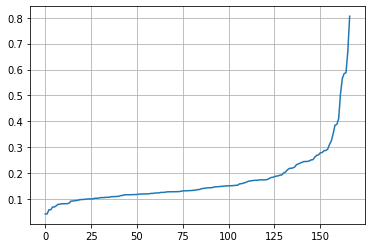

In [ ]:
df_dbscan = df_norm2.drop(['cluster'], axis=1)

vizinho = NearestNeighbors()
vizinhoProximo = vizinho.fit(df_dbscan)

distancias, indices = vizinhoProximo.kneighbors(df_dbscan)
distancias = np.sort(distancias, axis=0)
distancias = distancias[:,1]

plt.grid()
plt.plot(distancias)

### Aplicação

#### Índice da silhueta

Aqui usamos o índice da silhueta para desempatar os valores de epsolon.

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.235, min_samples=5) 

# 0,22 = 0,2303
# 0,23 = 0,2718
# 0,24 = 0,2367
# 0,233 = 0,2754
# 0,238 = 0,2445

dbscan.fit(df_dbscan)

print(f'Método da Silhueta: {silhouette_score(df_dbscan, dbscan.labels_):.4f}')

Método da Silhueta: 0.2754


In [ ]:
df_dbscan['cluster'] = dbscan.labels_

df_dbscan = df_dbscan.reset_index()
fig = px.choropleth(df_dbscan,
                    locationmode='country names',
                    locations='pais',
                    color='cluster',
                    title='Agrupamento de regiões'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Diferente do gráfico do Kmeans, este é mais difícil de interpretar, as regiões de cores semelhantes são ambíguas quando muito. Países da África central estarem agrupados junto dos EUA não indica nenhum tipo de semelhança no mundo real, invalidando assim nosso critério externo de avaliação.

In [ ]:
df_dbscan.drop('pais',axis=1,inplace=True)
media = df_dbscan.groupby('cluster').mean()
df_q = pd.DataFrame()

divisao = media.apply(lambda x: pd.qcut(x.rank(method="first"),[0,.2,.4,.65,.8,1.],labels=["Muito abaixo","Abaixo","Média","Acima","Muito acima"]), axis=0)
divisao

,mortalidade_infantil,exportacao,gasto_saude,importacao,renda,crescimento_pib,expectativa_vida,fertilidade,pib_per_capita
cluster,,,,,,,,,
-1,Média,Muito acima,Média,Muito acima,Muito acima,Muito acima,Média,Média,Muito acima
0,Muito acima,Muito abaixo,Muito abaixo,Muito abaixo,Muito abaixo,Média,Muito abaixo,Muito acima,Muito abaixo
1,Muito abaixo,Média,Muito acima,Média,Média,Muito abaixo,Muito acima,Muito abaixo,Média


## HDBSCAN

O HDBSCAN é como uma extensão do DBSCAN, transformando-o em um algoritmo de agrupamento hierárquico. Uma hierarquia pode ser formada começando com clusters unitários e juntando-os par a par com base em alguma medida de similaridade baseada na distância entre eles, até que estejam todos agrupados em um único cluster; ou, fazendo o mesmo, porém invertido, começando de um único cluster até clusters unitários. Nesse caso, o algoritmo usa o método de single-linkage para agrupar os dados, onde a distância entre grupos é definida pelo par de exemplos mais próximos em clusters diferentes. Com a hierarquia formada, os clusters são definidos com base na estabilidade de cada um, estabilidade esta que pode ser definida com base na densidade da região que se encontram cada ponto ou cluster.

In [ ]:
clusterer = hdbscan.HDBSCAN()

clusterer.fit(df_norm2)

HDBSCAN()

In [ ]:
df_norm2['cluster'] = clusterer.labels_
df_norm2 = df_norm2.reset_index()

fig2 = px.choropleth(df_norm2,
                      locationmode='country names',
                      locations='pais',
                      color='cluster',
                      title='Agrupamento de regiões'
                     )
fig2.update_geos(fitbounds="locations", visible=False)
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()

Novamente, assim como no gráfico do kmeans, o mundo foi dividido em regiões socioeconômicas muito parecidas. Países que antigamente se chamava "1º mundo" estão agrupados em roxo, os países mais emergentes estão pintados de laranja e os países que são explorados ou muito recentemente deixaram de ser expropriados de suas riquezas.

In [ ]:
df_norm3 = df_norm2.drop('pais',axis=1)

In [ ]:
media = df_norm3.groupby('cluster').mean()
df_q = pd.DataFrame()

divisao = media.apply(lambda x: pd.qcut(x.rank(method="first"),[0,.2,.4,.65,.8,1.],labels=["Muito abaixo","Abaixo","Média","Acima","Muito acima"]), axis=0)


divisao

,mortalidade_infantil,exportacao,gasto_saude,importacao,renda,crescimento_pib,expectativa_vida,fertilidade,pib_per_capita
cluster,,,,,,,,,
-1,Muito abaixo,Muito acima,Muito abaixo,Muito acima,Muito acima,Muito abaixo,Muito acima,Muito abaixo,Muito acima
0,Abaixo,Acima,Muito acima,Abaixo,Acima,Abaixo,Acima,Abaixo,Acima
1,Acima,Abaixo,Abaixo,Acima,Abaixo,Acima,Abaixo,Acima,Abaixo
2,Muito acima,Muito abaixo,Acima,Muito abaixo,Muito abaixo,Muito acima,Muito abaixo,Muito acima,Muito abaixo


Fizemos gráficos sob o resultado do HDBSCAN, e podemos observar seu critério de clusterização, principalmente no single linkage, onde pode se observar claramente a existência de 3 clusteres maiores, e no canto superior direito, dois "outliers", com indicadores de qualidade de vida exorbitantemente altos

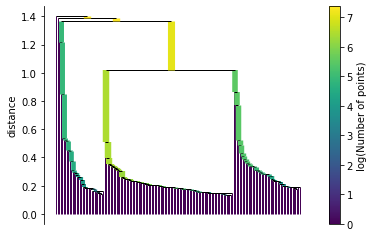

In [ ]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

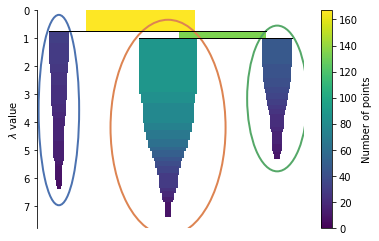

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 8))

Quanto menor o valor do Davies Bouldin, melhor a sua avaliação, sendo ele sempre maior que 0

In [ ]:
davies_bouldin_score(df_kmeans.drop(['cluster','pais'],axis=1),df_kmeans['cluster'])

1.7424908010039746

In [ ]:
davies_bouldin_score(df_norm3.drop(['cluster'],axis=1),df_norm3['cluster'])

0.9513776206060673

In [ ]:
davies_bouldin_score(df_dbscan.drop(['cluster'],axis=1),df_dbscan['cluster'])

2.2480597996441367

Analisando pelo índice de Davies Bouldin, podemos perceber que obtivemos resultados satisfatórios quando usando Kmeans, e o HDBSCAN, o HDBSCAN em particular apresenta o melhor resultado quando comparado com o índice Davies Bouldin. 